In [1]:
#|default_exp app
from fastai.vision.all import *
import gradio as gr
print(gr.__version__)

def is_cat(x): return x[0].isupper()

3.46.0


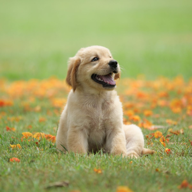

In [2]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [3]:
#|export
learn = load_learner('catornot_model.pkl')

In [4]:
learn.predict(im)

('False', tensor(0), tensor([9.9999e-01, 8.7761e-06]))

In [5]:
%time learn.predict(im)

CPU times: user 2.03 s, sys: 2.22 s, total: 4.24 s
Wall time: 284 ms


('False', tensor(0), tensor([9.9999e-01, 8.7761e-06]))

In [6]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'Dog': 0.9999911785125732, 'Cat': 8.776089998718817e-06}

In [8]:
#|export
image = gr.Image(shape=(192,192))
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# export

In [10]:
from nbdev.export import nb_export
nb_export('app.ipynb', '.')